In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [694]:
dataset = pd.read_csv("dataset/train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [695]:
Id = dataset.iloc[:, 0]

y = dataset.iloc[:, 1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [696]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [697]:
X = dataset.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])

In [698]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [699]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [700]:
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
X['Age'] = X['Age'].fillna(X['Age'].mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_21340\2705951317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)


In [701]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [702]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

ct = ColumnTransformer(
    transformers=[('encoder', encoder, ['Sex', 'Embarked'])],
    remainder='passthrough'
)

encoded_data = ct.fit_transform(X)

encoded_column_names = ct.transformers_[0][1].get_feature_names_out(['Sex', 'Embarked'])

remaining_columns = [col for col in X.columns if col not in ['Sex', 'Embarked']]

final_column_names = list(encoded_column_names) + remaining_columns

encoded_dataset = pd.DataFrame(encoded_data, columns=final_column_names)

encoded_dataset.columns

X = encoded_dataset

In [703]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_male    891 non-null    float64
 1   Embarked_Q  891 non-null    float64
 2   Embarked_S  891 non-null    float64
 3   Pclass      891 non-null    float64
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    float64
 6   Parch       891 non-null    float64
 7   Fare        891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [704]:
X.isnull().sum()

Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [705]:
X.describe()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,0.086420,0.725028,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.477990,0.281141,0.446751,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,1.000000,0.000000,1.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,0.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>Feature Engineering</b>

In [706]:
dataset = X
dataset['y'] = y
dataset.head()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare,y
0,1.0,0.0,1.0,3.0,22.0,1.0,0.0,7.2500,0
1,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833,1
2,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250,1
3,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000,1
4,1.0,0.0,1.0,3.0,35.0,0.0,0.0,8.0500,0


In [707]:
dataset.corr()

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare,y
Sex_male,1.000000,-0.074115,0.119224,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-0.543351
Embarked_Q,-0.074115,1.000000,-0.499421,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,0.003650
Embarked_S,0.119224,-0.499421,1.000000,0.074053,-0.019336,0.068734,0.060814,-0.162184,-0.149683
Pclass,0.131900,0.221009,0.074053,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.338481
Age,0.084153,-0.013855,-0.019336,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.069809
SibSp,-0.114631,-0.026354,0.068734,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.035322
Parch,-0.245489,-0.081228,0.060814,0.018443,-0.179191,0.414838,1.000000,0.216225,0.081629
Fare,-0.182333,-0.117216,-0.162184,-0.549500,0.091566,0.159651,0.216225,1.000000,0.257307
y,-0.543351,0.003650,-0.149683,-0.338481,-0.069809,-0.035322,0.081629,0.257307,1.000000


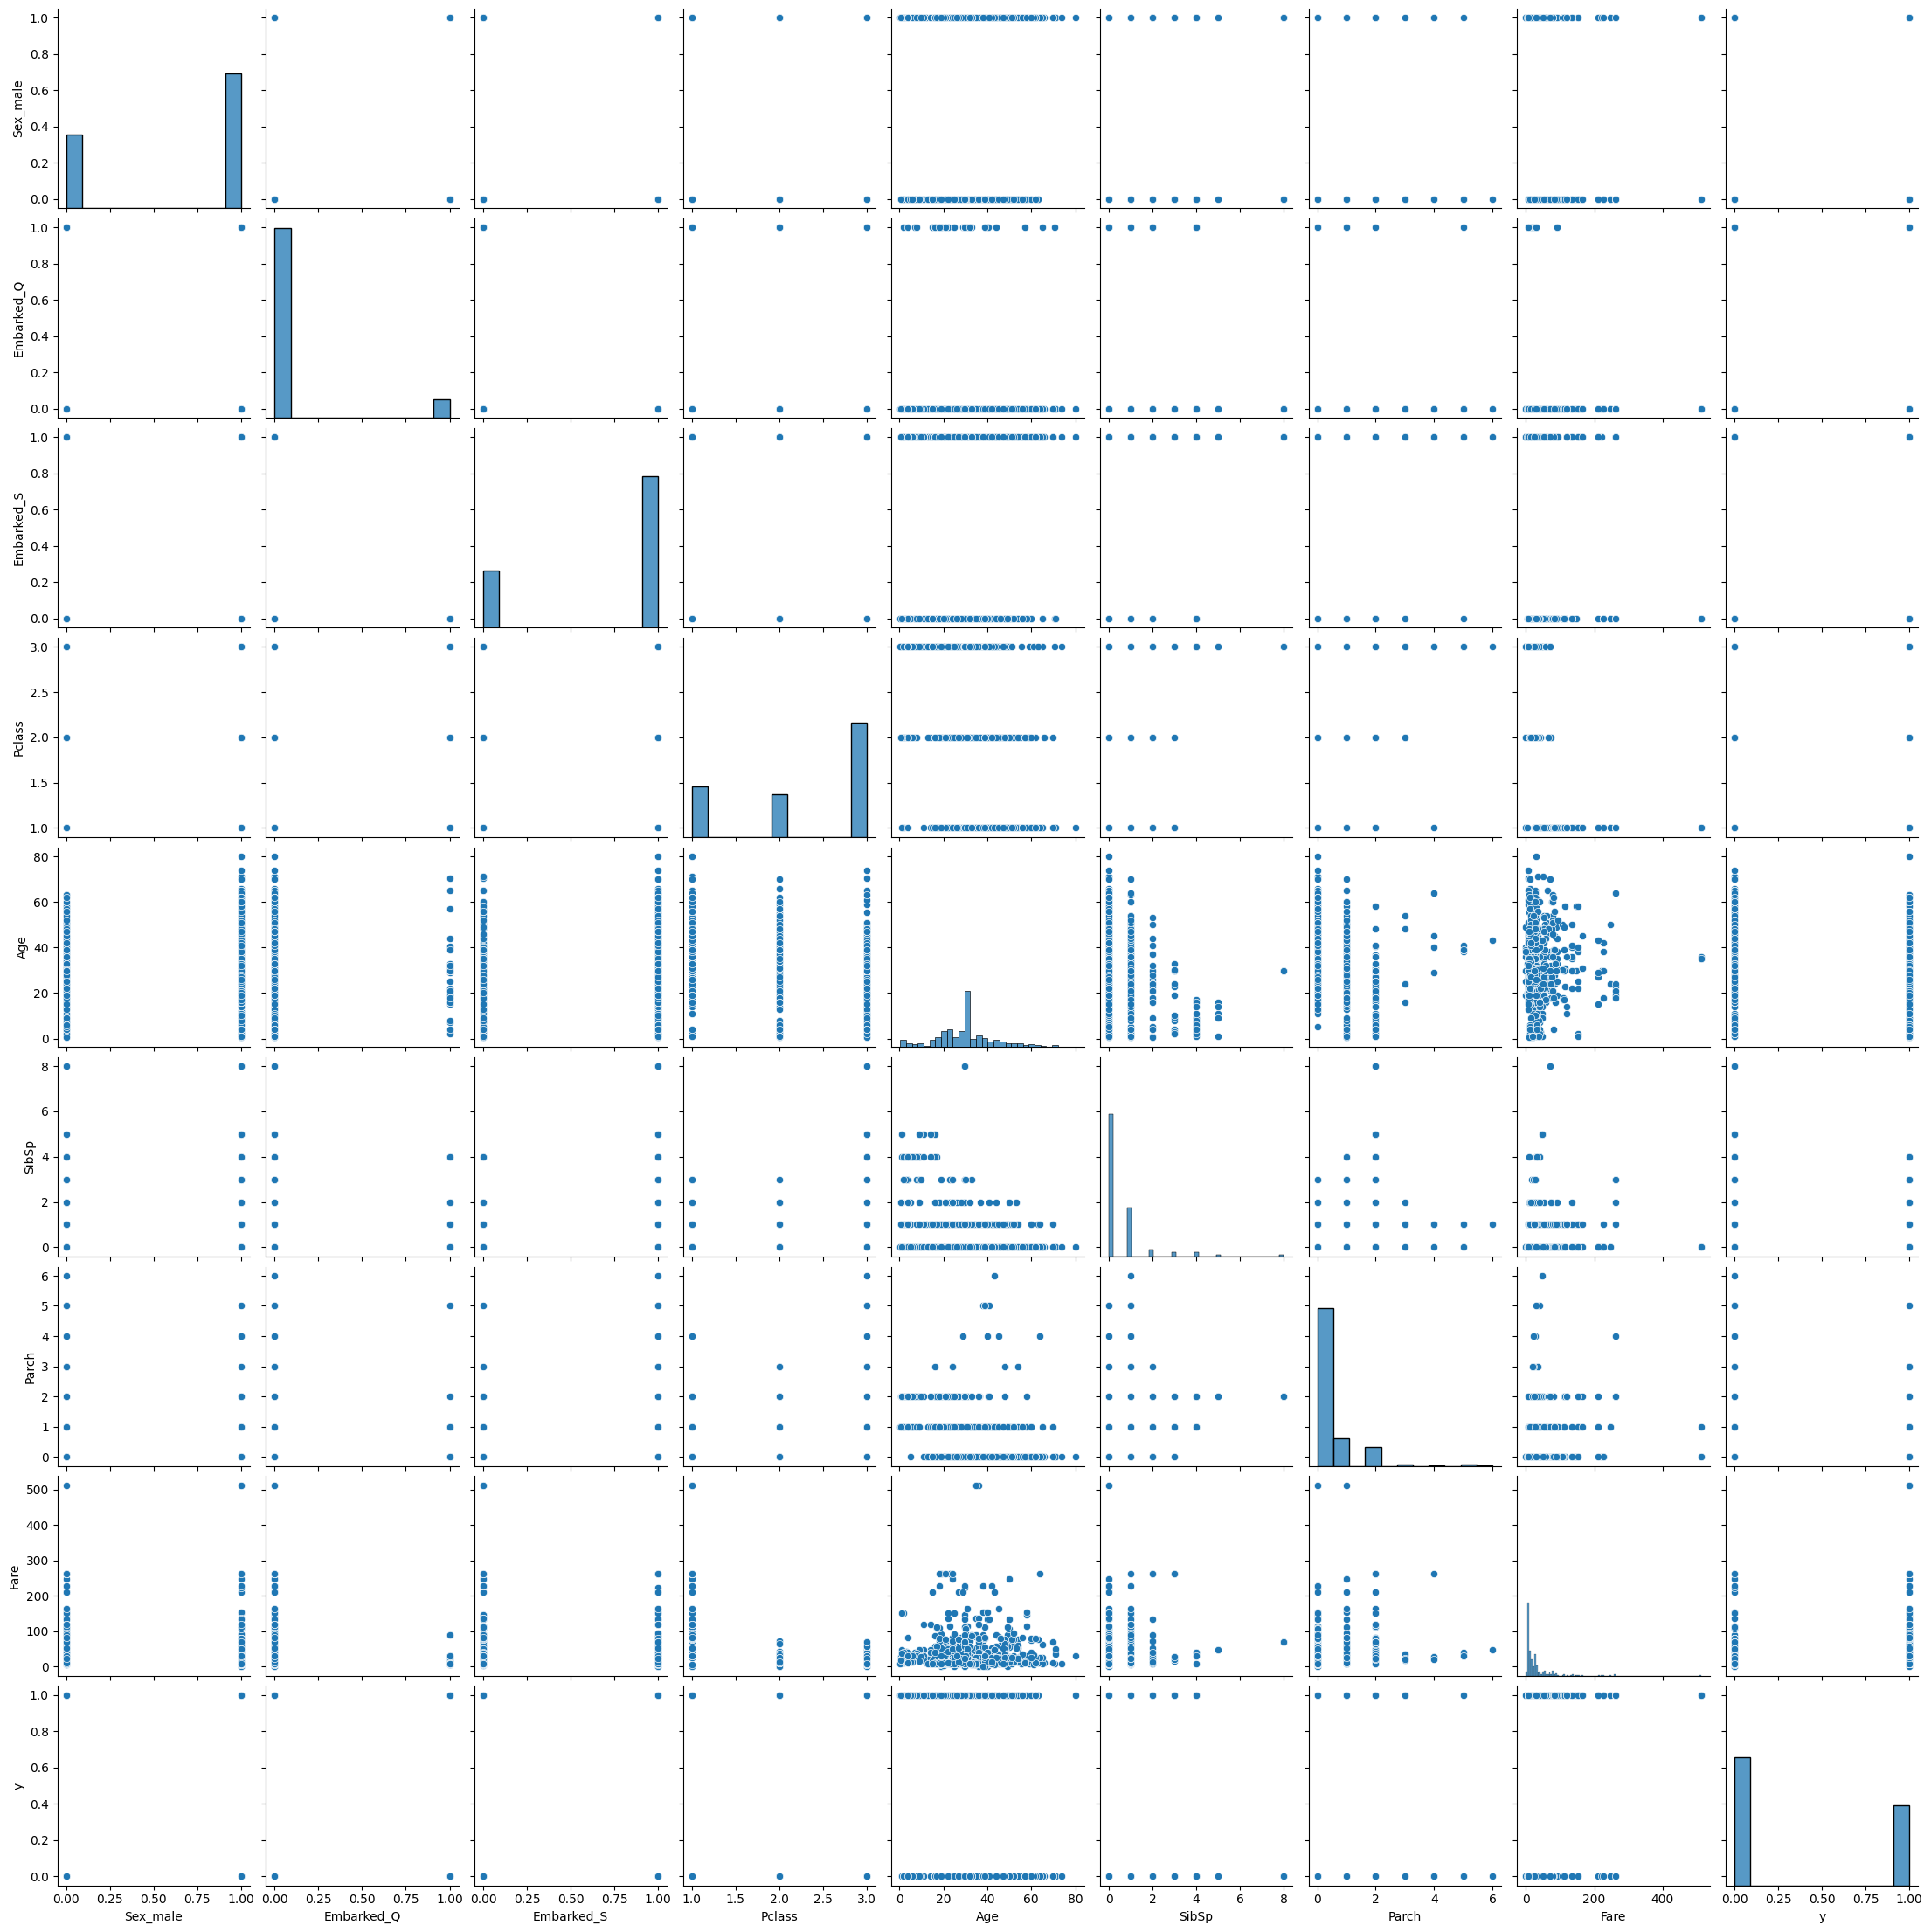

In [708]:
import seaborn as sns
sns.pairplot(dataset)

<Axes: xlabel='Age', ylabel='y'>

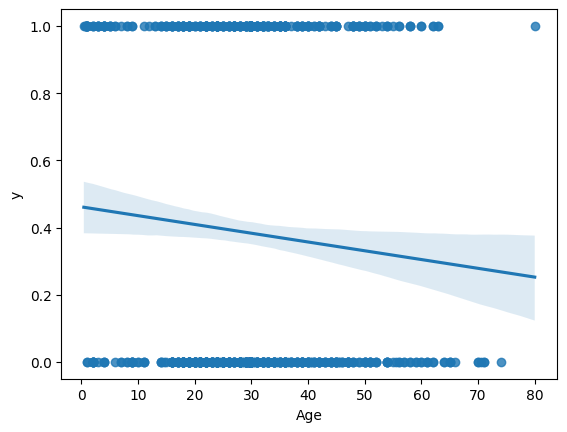

In [709]:
sns.regplot(x="Age", y="y", data=dataset)

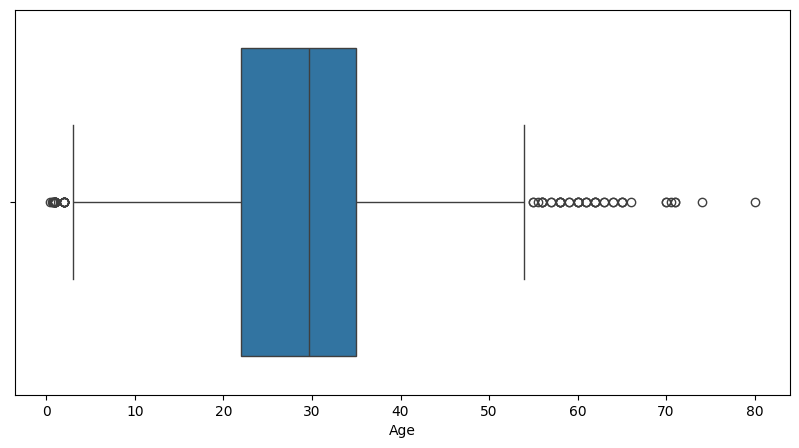

In [710]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Age", data=dataset)
plt.show()

<Axes: ylabel='Fare'>

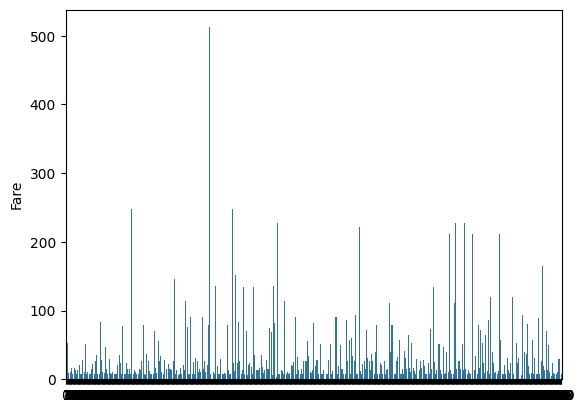

In [711]:
sns.barplot(dataset["Fare"])

C:\Users\HP\AppData\Local\Temp\ipykernel_21340\1741011122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])


<Axes: xlabel='Age', ylabel='Density'>

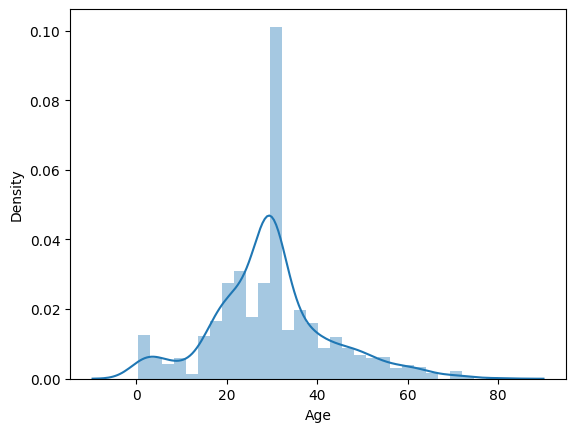

In [712]:
sns.distplot(dataset["Age"])

In [713]:
min_range = dataset["Age"].mean() - (3*dataset["Age"].std())
max_range = dataset["Age"].mean() + (3*dataset["Age"].std())

min_range, max_range

(-9.306928030949827, 68.70516332506747)

In [714]:
# min_range is negative, so do not need to consider it
new_dataset = dataset[dataset["Age"] <= max_range]

In [715]:
new_dataset.shape

(884, 9)

In [716]:
min_range = dataset["Fare"].mean() - (3*dataset["Fare"].std())
max_range = dataset["Fare"].mean() + (3*dataset["Fare"].std())

print(min_range, max_range)

# min_range is negative, so do not need to consider it
new_dataset = dataset[dataset["Fare"] <= max_range]

new_dataset.shape

-116.87607782296804 181.2844937601173


(871, 9)

In [717]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_male    891 non-null    float64
 1   Embarked_Q  891 non-null    float64
 2   Embarked_S  891 non-null    float64
 3   Pclass      891 non-null    float64
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    float64
 6   Parch       891 non-null    float64
 7   Fare        891 non-null    float64
 8   y           891 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 62.8 KB


In [718]:
min_range = dataset["Embarked_Q"].mean() - (3*dataset["Embarked_Q"].std())
max_range = dataset["Embarked_Q"].mean() + (3*dataset["Embarked_Q"].std())

print(min_range, max_range)

# min_range is negative, so do not need to consider it
new_dataset = dataset[dataset["Embarked_Q"] <= max_range]

new_dataset.shape

-0.7570023233386929 0.9298418295115323


(814, 9)

In [719]:
# X = new_dataset
y = X['y']
X = X.drop(columns=['y'])
X

,Sex_male,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,0.0,0.0,0.0,1.0,38.000000,1.0,0.0,71.2833
2,0.0,0.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,1.0,0.0,1.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,2.0,27.000000,0.0,0.0,13.0000
887,0.0,0.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,0.0,1.0,3.0,29.699118,1.0,2.0,23.4500
889,1.0,0.0,0.0,1.0,26.000000,0.0,0.0,30.0000


In [720]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [721]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Cross Validation

In [722]:
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X, y, cv=5, scoring='accuracy'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    
    print(f"Cross-validation scores: {scores}")
    print(f"Mean {scoring}: {scores.mean():.4f}")
    return scores.mean()


Decision tree

In [723]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model = classifier
classifier.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[113  21]
 [ 34  55]]


0.7533632286995515

In [724]:
evaluate_model(model, X, y, cv=5, scoring='accuracy')

Cross-validation scores: [0.73184358 0.76404494 0.75842697 0.76966292 0.78651685]
Mean accuracy: 0.7621


0.7620990521624506

K-NN

In [725]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model = classifier

classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[113  21]
 [ 25  64]]


0.7937219730941704

In [726]:
evaluate_model(model, X, y, cv=5, scoring='accuracy')

Cross-validation scores: [0.61452514 0.66853933 0.7247191  0.73033708 0.71348315]
Mean accuracy: 0.6903


0.6903207582700396

Logistic Regression

In [727]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
model = classifier

classifier.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[115  19]
 [ 24  65]]


0.8071748878923767

In [728]:
evaluate_model(model, X, y)

Cross-validation scores: [0.78212291 0.78089888 0.78651685 0.76966292 0.8258427 ]
Mean accuracy: 0.7890


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

0.789008850668508

Random Forest

In [729]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model = classifier

classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[110  24]
 [ 27  62]]


0.7713004484304933

In [730]:
evaluate_model(model, X, y, cv=10, scoring='f1_weighted')

Cross-validation scores: [0.73333333 0.77220087 0.75497104 0.85497084 0.89857726 0.81776069
 0.78065407 0.73447598 0.83265866 0.82870714]
Mean f1_weighted: 0.8008


0.8008309889433229

SVM

In [731]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
model = classifier

classifier.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[112  22]
 [ 26  63]]


0.7847533632286996

In [732]:
evaluate_model(model, X, y, scoring='precision_macro') 

Cross-validation scores: [0.79391892 0.79947917 0.77508224 0.74238876 0.77875858]
Mean precision_macro: 0.7779


0.7779255326494325

Kernel SVM

In [733]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
model = classifier

classifier.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120  14]
 [ 26  63]]


0.820627802690583

In [734]:
evaluate_model(model, X, y, cv=5, scoring='accuracy')

Cross-validation scores: [0.59217877 0.71348315 0.69101124 0.68539326 0.69101124]
Mean accuracy: 0.6746


0.674615529470843